In [14]:
import numpy as np
import math
import open3d as o3d
import cv2
import matplotlib.pyplot as plt
import copy

In [17]:
pcd = o3d.io.read_point_cloud("pcd1.pcd")
o3d.visualization.draw([pcd])

In [2]:
from PIL import Image
from skimage import io,measure
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import numpy as np

<Figure size 640x480 with 0 Axes>

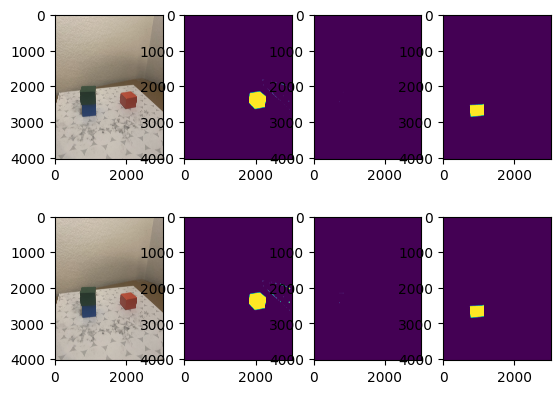

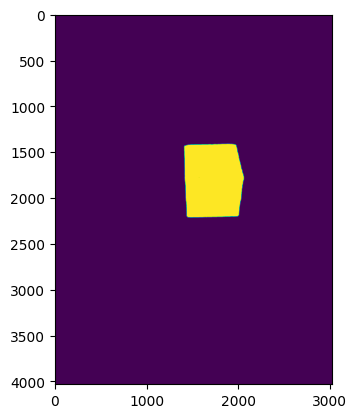

In [24]:
def getMask(img,hsvBounds):
    # :img 3-channel rgb image as numpy array
    # :hsvBounds tuple containing 2 triplets with hsv bounds. ex: (0,110,20),(15,255,255)
    # Segments image based on bounds in hsv color space (1st converts image from rgb space to hsv)
    # returns a 1-channel numpy array that results from segmentation
    # convert image to hsv
    hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
    mask = cv.inRange(img,hsvBounds)
    # binary closing with 10 x 10 kernel (dilation then erosion) to fill in gaps
    closedMask = nd.binary_closing(mask,np.ones(10,10),iterations=5)
    return closedMask

def getBlocksFromImages(colorImage,depthImage):
    # mask the depth image using the monochromatic segmented image so that only blocks have defined values
    redMask = getMask(colorImage,(0,110,20),(15,255,255))
    greenMask = getMask(colorImage,(35,90,10),(85,255,255))
    blueMask = getMask(colorImage,(95,90,20),(130,255,255))
    
    '''
    redDepthImage = np.multiply(depthImage,redMask)
    greenDepthImage = np.multiply(depthImage,greenMask)
    blueDepthImage = np.multiply(depthImage,blueMask)
    
    # depthImageSeg = np.multiply(depthImage,mask)
    images.append(redDepthImage)
    images.append(greenDepthImage)
    images.append(blueDepthImage)
    # SEGMENT PCD INTO RED,GREEN,BLUE BLOCKS
    redRGDB_Image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        o3d.geometry.Image(regImage),
        o3d.geometry.Image(np.array(redDepthImage).astype('uint16')),
        convert_rgb_to_intensity=False,
        depth_scale=1000.0)

    greenRGDB_Image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        o3d.geometry.Image(regImage),
        o3d.geometry.Image(np.array(greenDepthImage).astype('uint16')),
        convert_rgb_to_intensity=False,
        depth_scale=1000.0)
    
    blueRGBD_Image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        o3d.geometry.Image(regImage),
        o3d.geometry.Image(np.array(blueDepthImage).astype('uint16')),
        convert_rgb_to_intensity=False,
        depth_scale=1000.0)
    
    redPCD = o3d.geometry.PointCloud.create_from_rgbd_image(
        redRGDB_Image,
        o3d.camera.PinholeCameraIntrinsic(320,240,320,240,160,120),
        project_valid_depth_only=True
    )
    greenPCD = o3d.geometry.PointCloud.create_from_rgbd_image(
        greenRGDB_Image,
        o3d.camera.PinholeCameraIntrinsic(320,240,320,240,160,120),
        project_valid_depth_only=True
    )
    bluePCD = o3d.geometry.PointCloud.create_from_rgbd_image(
        blueRGBD_Image,
        o3d.camera.PinholeCameraIntrinsic(320,240,320,240,160,120),
        project_valid_depth_only=True
    )
    
    # flip point clouds since they start upside down
    # redPCD.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    # greenPCD.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    # bluePCD.transform([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,1]])
    redPCD.paint_uniform_color([1,0,0])
    greenPCD.paint_uniform_color([0,1,0])
    bluePCD.paint_uniform_color([0,0,1])
    redBlock = Block("redBlock",redPCD)
    greenBlock = Block("greenBlock",greenPCD)
    blueBlock = Block("blueBlock",bluePCD)
    showImages(images)
    o3d.visualization.draw([redPCD])
    '''
    return (redBlock,greenBlock,blueBlock)

In [ ]:


fig = plt.figure()
f,axarr = plt.subplots(2,4)
img = np.load("colorImage1.npy")
# img = io.imread("colorImage1.npy")
# convert image to hsv
hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
# HSV visual - https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv
redMask = cv.inRange(hsv,(0,110,20),(15,255,255))
greenMask = cv.inRange(hsv,(35,90,10),(85,255,255))
blueMask = cv.inRange(hsv,(95,90,20),(130,255,255)) 
# binary closing with 10 x 10 kernel (dilation then erosion) to fill in gaps
closedRedMask = nd.binary_closing(redMask,np.ones((10,10)),iterations=5)
closedGreenMask = nd.binary_closing(greenMask,np.ones((10,10)),iterations=5)
closedBlueMask = nd.binary_closing(blueMask,np.ones((10,10)),iterations=5)
axarr[0][0].imshow(img)
axarr[0][1].imshow(redMask)
axarr[0][2].imshow(greenMask)
axarr[0][3].imshow(blueMask)
axarr[1][0].imshow(img)
axarr[1][1].imshow(closedRedMask)
axarr[1][2].imshow(closedGreenMask)
axarr[1][3].imshow(closedBlueMask)
fig2 = plt.figure()
f2,axarr2 = plt.subplots(1,2)
axarr2[0].imshow(img)
axarr[2].imshow(closedRedMask)

In [ ]:
fig = plt.figure()
f,axarr = plt.subplots(2,4)
mask1,mask2 = None,None
for i in range(1866,1867):
    path = f"IMG_{i}.jpeg"
    img = io.imread(path)
    # convert image to hsv
    hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
    # HSV visual - https://stackoverflow.com/questions/10948589/choosing-the-correct-upper-and-lower-hsv-boundaries-for-color-detection-withcv
    redMask = cv.inRange(hsv,(0,110,20),(15,255,255))
    greenMask = cv.inRange(hsv,(35,90,10),(85,255,255))
    blueMask = cv.inRange(hsv,(95,90,20),(130,255,255)) 
    # binary closing with 10 x 10 kernel (dilation then erosion) to fill in gaps
    closedRedMask = nd.binary_closing(redMask,np.ones((10,10)),iterations=5)
    closedGreenMask = nd.binary_closing(greenMask,np.ones((10,10)),iterations=5)
    closedBlueMask = nd.binary_closing(blueMask,np.ones((10,10)),iterations=5)
    mask1,mask2 = closedGreenMask,closedBlueMask
    axarr[0][0].imshow(img)
    axarr[0][1].imshow(redMask)
    axarr[0][2].imshow(greenMask)
    axarr[0][3].imshow(blueMask)
    axarr[1][0].imshow(img)
    axarr[1][1].imshow(closedRedMask)
    axarr[1][2].imshow(closedGreenMask)
    axarr[1][3].imshow(closedBlueMask)
